# Application of Back-Propagation Neural Networks

# Classification Example

################# error 111.90337##################The 0 th iteration
################# error 110.48350##################The 10 th iteration
################# error 105.09697##################The 20 th iteration
################# error 71.95164##################The 30 th iteration
################# error 40.29955##################The 40 th iteration
################# error 25.64685##################The 50 th iteration
################# error 18.33151##################The 60 th iteration
################# error 14.13278##################The 70 th iteration
################# error 11.45579##################The 80 th iteration
################# error 9.61525##################The 90 th iteration
################# error 8.27770##################The 100 th iteration
################# error 7.26400##################The 110 th iteration
################# error 6.47021##################The 120 th iteration
################# error 5.83221##################The 130 th iteration
################# e

Text(0.5, 0, 'y')

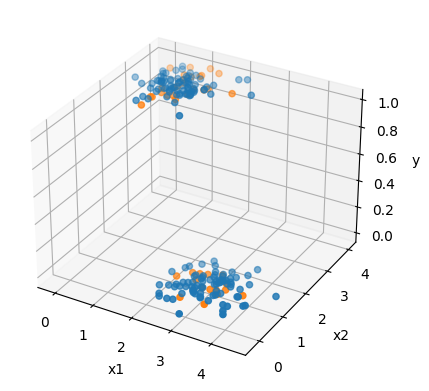

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 18 11:43:49 2022

@author: Y P Zhu

NN classification algorithm 
"""
import os
os.system('cls')  # On Windows System

from IPython import get_ipython
get_ipython().run_line_magic('reset','-sf')

"""
Start coding
"""
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Import pyplot
# plt.close('all')

"""
---- NN classification based on Python coding
"""

# Random data
def random_number(a,b):
    return (b-a)*np.random.normal()+a
 
# Generate m*n matrix, initial values are zeros
def makematrix(m, n, fill=0.0):
    a = []
    for i in range(m):
        a.append([fill]*n)
    return np.array(a)
 
# sigmoid() function (activation function)
def sigmoid(x):
    fAct = 1/(1+np.exp(-1*x))
    return fAct

# Derivation of the activation fucntion
def derived_sigmoid(x):
    fAct = 1/(1+np.exp(-1*x))
    DfAct = fAct*(1-fAct)
    return DfAct

# 3-layer BP Neural Networks
class BPNN:
    def __init__(self, num_in, num_hidden, num_out):
        # Nodes of input, hidden, output layers
        self.num_in = num_in + 1  # Add one bias node
        self.num_hidden = num_hidden + 1   # Add one bias node
        self.num_out = num_out
        
        # Activate all nodes (vector)
        self.active_in = np.array([1.0]*self.num_in)
        self.active_hidden = np.array([1.0]*self.num_hidden)
        self.active_out = np.array([1.0]*self.num_out)
        
        # Create weight matrices
        self.wight_in = makematrix(self.num_in, self.num_hidden-1)
        self.wight_out = makematrix(self.num_hidden, self.num_out)
        
        # Initialize weights
        for i in range(self.num_in):
            for j in range(self.num_hidden-1):
                self.wight_in[i][j] = random_number(0.1, 0.1)
        for i in range(self.num_hidden):
            for j in range(self.num_out):
                self.wight_out[i][j] = random_number(0.1, 0.1)
        # Initialize bias
        for j in range(self.num_hidden-1):
            self.wight_in[0][j] = 0.1
        for j in range(self.num_out):
            self.wight_out[0][j] = 0.1
              
    # Feed-forward
    def Feedforward(self, inputs):
        if np.shape(inputs)[1] != self.num_in-1:
            raise ValueError('Incorrect input numbers')
        # Input layer values
        self.active_in[1:self.num_in]=inputs
        
        # Hidden layer values
        self.sum_hidden=np.dot(self.wight_in.T,np.array([self.active_in]).T)
        self.active_hidden = np.vstack( (1, sigmoid(self.sum_hidden)) )   # Activation function
            
        # Output layer values
        self.sum_out=np.dot(self.wight_out.T,self.active_hidden)
        self.active_out = sigmoid(self.sum_out)
        return self.active_out

 
    # Backpropagation
    def errorbackpropagate(self, targets):   # lr is the learning rate
        if self.num_out==1:
            targets=targets
        if np.shape(targets)[1] != self.num_out:
            raise ValueError('Incorrect Output numbers')
        # Cost function
        # self.error=(1/2)*np.dot((self.active_out-targets.T).T,(self.active_out-targets.T))
        self.error = -np.sum( np.multiply(np.log(self.active_out), targets.T) 
                      + np.multiply(np.log(1 - self.active_out),(1 - targets.T)) )
        
        # dJ/dw_out
        self.gradient_out = ( (self.active_out-targets.T)/(self.active_out*(1-self.active_out))
                             *derived_sigmoid(self.sum_out) )#dJ/dx
        self.gradient_w_out = np.dot(self.gradient_out,self.active_hidden.T).T #dx/dw_out
        
        # dJ/dw_in
        self.gradient_hidden = np.dot(self.wight_out[1:],self.gradient_out)*derived_sigmoid(self.sum_hidden) #dJ/dx
        self.gradient_w_in = np.dot(self.gradient_hidden,np.array([self.active_in])).T #dx/dw_in
       
        return self.error

    def train(self, pattern, itera=500, lr = 1):
        for i in range(itera):
            Gradient_out = 0.0
            Gradient_in = 0.0
            error = 0
            for j in pattern:
                inputs = np.array([j[0:self.num_in-1]])
                
                targets = np.array([j[self.num_in-1:]])
                self.Feedforward(inputs)
                self.errorbackpropagate(targets)
                Gradient_out = Gradient_out + self.gradient_w_out
                Gradient_in = Gradient_in + self.gradient_w_in
                             
                error = error + self.error
                
            [Tm,Tn] = np.shape(pattern)
            self.wight_out = self.wight_out - lr*Gradient_out/Tm
            self.wight_in = self.wight_in - lr*Gradient_in/Tm 
            
            if i % 10 == 0:
                print('################# error %-.5f##################The %d th iteration' %(error,i))
    # Weights
    def weights(self):
        print("input weights")
        print(self.wight_in)
        print("Output weights")
        print(self.wight_out)
        
    # Test prediction
    def test(self, patterns):
        Pre = []
        for i in patterns:
            inputs = np.array([i[0:self.num_in-1]])
            Pre.append( self.Feedforward(inputs) )
            # print(Pre)
        return Pre         

""" Distributed samples """
n_true = 80
n_false = 80
xt1 = np.random.normal(1, 0.5, n_true)
xt2 = np.random.normal(3, 0.5, n_true)
yt = np.ones((n_true, 1))
xf1 = np.random.normal(3, 0.5, n_false)
xf2 = np.random.normal(1, 0.5, n_false)
yf = np.zeros((n_false, 1))

nsp = n_true + n_false
y_data = np.vstack((yt, yf))
x1 = np.array( [np.hstack((xt1, xf1))] )
x2 = np.array( [np.hstack((xt2, xf2))] )
pattern = np.hstack( (x1.T,x2.T,y_data) )

n = BPNN(2, 2, 1)
  
n.train(pattern) # Training BP

xt1p = np.random.normal(1, 0.5, 25)
xt2p = np.random.normal(3, 0.5, 25)
xf1p = np.random.normal(3, 0.5, 15)
xf2p = np.random.normal(1, 0.5, 15)

x1p = np.array( [np.hstack((xt1p, xf1p))] )
x2p = np.array( [np.hstack((xt2p, xf2p))] )
InP = np.hstack( (x1p.T,x2p.T) )
    
d=n.test(InP) # Test BP

y_pred = np.zeros((40,))
for i in range(40):
    y_pred[i] = d[i][0,0]
    
n.weights() # check weights

plt.figure(1)
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y_data, cmap='b')
ax.scatter3D(x1p, x2p, y_pred, cmap='r')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
# plt.legend() # Show the labels
# # plt.show() # Optional in Spyder (interactive mode)

# Regression Examples

################# error 1036.64832##################The 0 th iteration
################# error 196.91912##################The 10 th iteration
################# error 173.75943##################The 20 th iteration
################# error 158.67656##################The 30 th iteration
################# error 142.55075##################The 40 th iteration
################# error 125.26781##################The 50 th iteration
################# error 107.15098##################The 60 th iteration
################# error 88.84100##################The 70 th iteration
################# error 71.17039##################The 80 th iteration
################# error 54.99472##################The 90 th iteration
################# error 41.01162##################The 100 th iteration
################# error 29.63711##################The 110 th iteration
################# error 21.18264##################The 120 th iteration
################# error 19.32657##################The 130 th iteration
#########

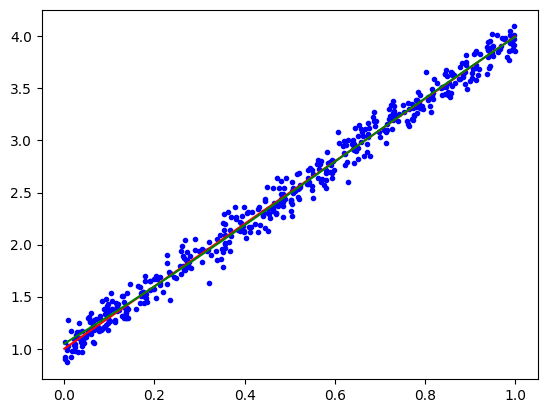

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 18 11:43:49 2022

@author: Y P Zhu

NN regression algorithm - Line 
"""
import os
os.system('cls')  # On Windows System

from IPython import get_ipython
get_ipython().run_line_magic('reset','-sf')

"""
Start coding
"""
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Import pyplot
# plt.close('all')

"""
---- NN regresion based on Python coding
"""

# Random data
def random_number(a,b):
    return (b-a)*np.random.normal()+a
 
# Generate m*n matrix, initial values are zeros
def makematrix(m, n, fill=0.0):
    a = []
    for i in range(m):
        a.append([fill]*n)
    return np.array(a)
 
# sigmoid() function (activation function)
def sigmoid(x):
    fAct = 1/(1+np.exp(-1*x))
    return fAct

# Derivation of the activation fucntion
def derived_sigmoid(x):
    fAct = 1/(1+np.exp(-1*x))
    DfAct = fAct*(1-fAct)
    return DfAct

# 3-layer BP Neural Networks
class BPNN:
    def __init__(self, num_in, num_hidden, num_out):
        # Nodes of input, hidden, output layers
        self.num_in = num_in + 1  # Add one bias node
        self.num_hidden = num_hidden + 1   # Add one bias node
        self.num_out = num_out
        
        # Activate all nodes (vector)
        self.active_in = np.array([1.0]*self.num_in)
        self.active_hidden = np.array([1.0]*self.num_hidden)
        self.active_out = np.array([1.0]*self.num_out)
        
        # Create weight matrices
        self.wight_in = makematrix(self.num_in, self.num_hidden-1)
        self.wight_out = makematrix(self.num_hidden, self.num_out)
        
        # Initialize weights
        for i in range(self.num_in):
            for j in range(self.num_hidden-1):
                self.wight_in[i][j] = random_number(0.1, 0.1)
        for i in range(self.num_hidden):
            for j in range(self.num_out):
                self.wight_out[i][j] = random_number(0.1, 0.1)
        # Initialize bias
        for j in range(self.num_hidden-1):
            self.wight_in[0][j] = 0.1
        for j in range(self.num_out):
            self.wight_out[0][j] = 0.1
              
    # Feed-forward
    def Feedforward(self, inputs):
        if np.shape(inputs)[1] != self.num_in-1:
            raise ValueError('Incorrect input numbers')
        # Input layer values
        self.active_in[1:self.num_in]=inputs
        
        # Hidden layer values
        self.sum_hidden=np.dot(self.wight_in.T,np.array([self.active_in]).T)
        self.active_hidden = np.vstack( (1, sigmoid(self.sum_hidden)) )   # Activation function
            
        # Output layer values
        self.sum_out=np.dot(self.wight_out.T,self.active_hidden)
        self.active_out = self.sum_out # or sigmoid(self.sum_out)
        return self.active_out

 
    # Backpropagation
    def errorbackpropagate(self, targets):   # lr is the learning rate
        if self.num_out==1:
            targets=targets
        if np.shape(targets)[1] != self.num_out:
            raise ValueError('Incorrect Output numbers')
        # Cost function
        self.error=(1/2)*np.dot((self.active_out-targets.T).T,(self.active_out-targets.T))
        
        # dJ/dw_out
        self.gradient_out = (self.active_out-targets.T) #*derived_sigmoid(self.sum_out)#dJ/dx
        self.gradient_w_out = np.dot(self.gradient_out,self.active_hidden.T).T #dx/dw_out
        
        # dJ/dw_in
        self.gradient_hidden = np.dot(self.wight_out[1:],self.gradient_out)*derived_sigmoid(self.sum_hidden) #dJ/dx
        self.gradient_w_in = np.dot(self.gradient_hidden,np.array([self.active_in])).T #dx/dw_in
       
        return self.error

    def train(self, pattern, itera=500, lr = 0.5):
        for i in range(itera):
            Gradient_out = 0.0
            Gradient_in = 0.0
            error = 0
            for j in pattern:
                inputs = np.array([j[0:self.num_in-1]])
                
                targets = np.array([j[self.num_in-1:]])
                self.Feedforward(inputs)
                self.errorbackpropagate(targets)
                Gradient_out = Gradient_out + self.gradient_w_out
                Gradient_in = Gradient_in + self.gradient_w_in
            
                error = error + self.error
                
            [Tm,Tn] = np.shape(pattern)
            self.wight_out = self.wight_out - lr*Gradient_out/Tm
            self.wight_in = self.wight_in - lr*Gradient_in/Tm 
            
            if i % 10 == 0:
                print('################# error %-.5f##################The %d th iteration' %(error,i))
    # Weights
    def weights(self):
        print("input weights")
        print(self.wight_in)
        print("Output weights")
        print(self.wight_out)
        
    # Test prediction
    def test(self, patterns):
        Pre = []
        for i in patterns:
            inputs = np.array([i[0:self.num_in-1]])
            Pre.append( self.Feedforward(inputs) )
            # print(Pre)
        return Pre         

""" Distributed samples """
nsp=500

x_sample = np.random.uniform(0, 1, nsp) # Select nsp points as the x
y_tag = 3 * x_sample + 1 # The target function

np.random.seed(5)
y_noi = np.random.normal(0, 0.1, nsp) + y_tag # Normal distribution noise

pattern = np.vstack( (x_sample,y_noi) ).T

n = BPNN(1, 10, 1) #Create neural networK 
n.train(pattern) # Training BP
    
xp_sample = np.linspace(0, 1, 1000) # Select 1000 points as the x_p
y_true = 3 * xp_sample + 1 # The target function

patternP = np.vstack( (xp_sample, y_true) ).T
d=n.test(patternP)

y_pred = np.zeros((1000,))
for i in range(1000):
  y_pred[i] = d[i][0,0]
    
n.weights() # check weights

plt.figure(1)
plt.plot(x_sample, y_noi, 'b.')
plt.plot(xp_sample,y_true,'r')
plt.plot(xp_sample,y_pred,'g')
plt.show()


################# error 44.49935##################The 0 th iteration
################# error 1.31671##################The 10 th iteration
################# error 1.06107##################The 20 th iteration
################# error 1.25490##################The 30 th iteration
################# error 1.26031##################The 40 th iteration
################# error 1.15306##################The 50 th iteration
################# error 1.03917##################The 60 th iteration
################# error 0.91500##################The 70 th iteration
################# error 0.74865##################The 80 th iteration
################# error 0.50943##################The 90 th iteration
################# error 0.31365##################The 100 th iteration
################# error 0.26128##################The 110 th iteration
################# error 0.25968##################The 120 th iteration
################# error 0.26147##################The 130 th iteration
################# error 0.2579

################# error 0.17844##################The 1310 th iteration
################# error 0.17834##################The 1320 th iteration
################# error 0.17824##################The 1330 th iteration
################# error 0.17815##################The 1340 th iteration
################# error 0.17805##################The 1350 th iteration
################# error 0.17796##################The 1360 th iteration
################# error 0.17786##################The 1370 th iteration
################# error 0.17777##################The 1380 th iteration
################# error 0.17768##################The 1390 th iteration
################# error 0.17759##################The 1400 th iteration
################# error 0.17750##################The 1410 th iteration
################# error 0.17741##################The 1420 th iteration
################# error 0.17733##################The 1430 th iteration
################# error 0.17724##################The 1440 th iteration
######

################# error 0.16943##################The 2760 th iteration
################# error 0.16938##################The 2770 th iteration
################# error 0.16933##################The 2780 th iteration
################# error 0.16929##################The 2790 th iteration
################# error 0.16924##################The 2800 th iteration
################# error 0.16919##################The 2810 th iteration
################# error 0.16915##################The 2820 th iteration
################# error 0.16910##################The 2830 th iteration
################# error 0.16905##################The 2840 th iteration
################# error 0.16901##################The 2850 th iteration
################# error 0.16896##################The 2860 th iteration
################# error 0.16892##################The 2870 th iteration
################# error 0.16887##################The 2880 th iteration
################# error 0.16882##################The 2890 th iteration
######

################# error 0.16298##################The 4100 th iteration
################# error 0.16293##################The 4110 th iteration
################# error 0.16287##################The 4120 th iteration
################# error 0.16281##################The 4130 th iteration
################# error 0.16276##################The 4140 th iteration
################# error 0.16270##################The 4150 th iteration
################# error 0.16264##################The 4160 th iteration
################# error 0.16258##################The 4170 th iteration
################# error 0.16253##################The 4180 th iteration
################# error 0.16247##################The 4190 th iteration
################# error 0.16241##################The 4200 th iteration
################# error 0.16235##################The 4210 th iteration
################# error 0.16229##################The 4220 th iteration
################# error 0.16223##################The 4230 th iteration
######

################# error 0.15223##################The 5440 th iteration
################# error 0.15213##################The 5450 th iteration
################# error 0.15203##################The 5460 th iteration
################# error 0.15193##################The 5470 th iteration
################# error 0.15183##################The 5480 th iteration
################# error 0.15174##################The 5490 th iteration
################# error 0.15164##################The 5500 th iteration
################# error 0.15154##################The 5510 th iteration
################# error 0.15145##################The 5520 th iteration
################# error 0.15135##################The 5530 th iteration
################# error 0.15126##################The 5540 th iteration
################# error 0.15116##################The 5550 th iteration
################# error 0.15107##################The 5560 th iteration
################# error 0.15097##################The 5570 th iteration
######

################# error 0.14522##################The 6760 th iteration
################# error 0.14520##################The 6770 th iteration
################# error 0.14518##################The 6780 th iteration
################# error 0.14517##################The 6790 th iteration
################# error 0.14515##################The 6800 th iteration
################# error 0.14513##################The 6810 th iteration
################# error 0.14512##################The 6820 th iteration
################# error 0.14510##################The 6830 th iteration
################# error 0.14508##################The 6840 th iteration
################# error 0.14507##################The 6850 th iteration
################# error 0.14505##################The 6860 th iteration
################# error 0.14504##################The 6870 th iteration
################# error 0.14502##################The 6880 th iteration
################# error 0.14501##################The 6890 th iteration
######

################# error 0.14370##################The 8050 th iteration
################# error 0.14369##################The 8060 th iteration
################# error 0.14368##################The 8070 th iteration
################# error 0.14367##################The 8080 th iteration
################# error 0.14366##################The 8090 th iteration
################# error 0.14365##################The 8100 th iteration
################# error 0.14364##################The 8110 th iteration
################# error 0.14363##################The 8120 th iteration
################# error 0.14363##################The 8130 th iteration
################# error 0.14362##################The 8140 th iteration
################# error 0.14361##################The 8150 th iteration
################# error 0.14360##################The 8160 th iteration
################# error 0.14359##################The 8170 th iteration
################# error 0.14358##################The 8180 th iteration
######

################# error 0.14258##################The 9390 th iteration
################# error 0.14257##################The 9400 th iteration
################# error 0.14257##################The 9410 th iteration
################# error 0.14256##################The 9420 th iteration
################# error 0.14255##################The 9430 th iteration
################# error 0.14254##################The 9440 th iteration
################# error 0.14254##################The 9450 th iteration
################# error 0.14253##################The 9460 th iteration
################# error 0.14252##################The 9470 th iteration
################# error 0.14251##################The 9480 th iteration
################# error 0.14251##################The 9490 th iteration
################# error 0.14250##################The 9500 th iteration
################# error 0.14249##################The 9510 th iteration
################# error 0.14248##################The 9520 th iteration
######

################# error 0.14164##################The 10800 th iteration
################# error 0.14164##################The 10810 th iteration
################# error 0.14163##################The 10820 th iteration
################# error 0.14163##################The 10830 th iteration
################# error 0.14162##################The 10840 th iteration
################# error 0.14161##################The 10850 th iteration
################# error 0.14161##################The 10860 th iteration
################# error 0.14160##################The 10870 th iteration
################# error 0.14160##################The 10880 th iteration
################# error 0.14159##################The 10890 th iteration
################# error 0.14158##################The 10900 th iteration
################# error 0.14158##################The 10910 th iteration
################# error 0.14157##################The 10920 th iteration
################# error 0.14157##################The 10930 th it

################# error 0.14094##################The 12120 th iteration
################# error 0.14093##################The 12130 th iteration
################# error 0.14093##################The 12140 th iteration
################# error 0.14092##################The 12150 th iteration
################# error 0.14092##################The 12160 th iteration
################# error 0.14091##################The 12170 th iteration
################# error 0.14091##################The 12180 th iteration
################# error 0.14090##################The 12190 th iteration
################# error 0.14090##################The 12200 th iteration
################# error 0.14089##################The 12210 th iteration
################# error 0.14089##################The 12220 th iteration
################# error 0.14088##################The 12230 th iteration
################# error 0.14088##################The 12240 th iteration
################# error 0.14087##################The 12250 th it

################# error 0.14036##################The 13440 th iteration
################# error 0.14035##################The 13450 th iteration
################# error 0.14035##################The 13460 th iteration
################# error 0.14034##################The 13470 th iteration
################# error 0.14034##################The 13480 th iteration
################# error 0.14034##################The 13490 th iteration
################# error 0.14033##################The 13500 th iteration
################# error 0.14033##################The 13510 th iteration
################# error 0.14032##################The 13520 th iteration
################# error 0.14032##################The 13530 th iteration
################# error 0.14032##################The 13540 th iteration
################# error 0.14031##################The 13550 th iteration
################# error 0.14031##################The 13560 th iteration
################# error 0.14030##################The 13570 th it

################# error 0.13987##################The 14750 th iteration
################# error 0.13987##################The 14760 th iteration
################# error 0.13987##################The 14770 th iteration
################# error 0.13986##################The 14780 th iteration
################# error 0.13986##################The 14790 th iteration
################# error 0.13986##################The 14800 th iteration
################# error 0.13985##################The 14810 th iteration
################# error 0.13985##################The 14820 th iteration
################# error 0.13985##################The 14830 th iteration
################# error 0.13984##################The 14840 th iteration
################# error 0.13984##################The 14850 th iteration
################# error 0.13984##################The 14860 th iteration
################# error 0.13983##################The 14870 th iteration
################# error 0.13983##################The 14880 th it

################# error 0.13946##################The 16070 th iteration
################# error 0.13946##################The 16080 th iteration
################# error 0.13945##################The 16090 th iteration
################# error 0.13945##################The 16100 th iteration
################# error 0.13945##################The 16110 th iteration
################# error 0.13944##################The 16120 th iteration
################# error 0.13944##################The 16130 th iteration
################# error 0.13944##################The 16140 th iteration
################# error 0.13944##################The 16150 th iteration
################# error 0.13943##################The 16160 th iteration
################# error 0.13943##################The 16170 th iteration
################# error 0.13943##################The 16180 th iteration
################# error 0.13942##################The 16190 th iteration
################# error 0.13942##################The 16200 th it

################# error 0.13910##################The 17410 th iteration
################# error 0.13910##################The 17420 th iteration
################# error 0.13909##################The 17430 th iteration
################# error 0.13909##################The 17440 th iteration
################# error 0.13909##################The 17450 th iteration
################# error 0.13909##################The 17460 th iteration
################# error 0.13908##################The 17470 th iteration
################# error 0.13908##################The 17480 th iteration
################# error 0.13908##################The 17490 th iteration
################# error 0.13908##################The 17500 th iteration
################# error 0.13907##################The 17510 th iteration
################# error 0.13907##################The 17520 th iteration
################# error 0.13907##################The 17530 th iteration
################# error 0.13907##################The 17540 th it

################# error 0.13877##################The 18800 th iteration
################# error 0.13877##################The 18810 th iteration
################# error 0.13877##################The 18820 th iteration
################# error 0.13876##################The 18830 th iteration
################# error 0.13876##################The 18840 th iteration
################# error 0.13876##################The 18850 th iteration
################# error 0.13876##################The 18860 th iteration
################# error 0.13875##################The 18870 th iteration
################# error 0.13875##################The 18880 th iteration
################# error 0.13875##################The 18890 th iteration
################# error 0.13875##################The 18900 th iteration
################# error 0.13875##################The 18910 th iteration
################# error 0.13874##################The 18920 th iteration
################# error 0.13874##################The 18930 th it

checkx
[array([[-0.05488077]]), array([[0.02200428]]), array([[0.09561946]]), array([[0.16599268]]), array([[0.23315475]]), array([[0.29713849]]), array([[0.35797773]]), array([[0.41570644]]), array([[0.47035773]]), array([[0.52196304]]), array([[0.57055118]]), array([[0.61614754]]), array([[0.65877322]]), array([[0.69844425]]), array([[0.73517084]]), array([[0.76895669]]), array([[0.79979829]]), array([[0.82768439]]), array([[0.85259549]]), array([[0.87450346]]), array([[0.89337126]]), array([[0.90915287]]), array([[0.92179336]]), array([[0.93122921]]), array([[0.9373889]]), array([[0.94019379]]), array([[0.93955938]]), array([[0.93539693]]), array([[0.92761561]]), array([[0.91612504]]), array([[0.90083834]]), array([[0.88167575]]), array([[0.85856869]]), array([[0.83146425]]), array([[0.80033004]]), array([[0.76515933]]), array([[0.72597611]]), array([[0.68284015]]), array([[0.63585149]]), array([[0.58515434]]), array([[0.53093996]]), array([[0.47344819]]), array([[0.41296753]]), arr

[array([[-0.05488077]]), array([[0.02200428]]), array([[0.09561946]]), array([[0.16599268]]), array([[0.23315475]]), array([[0.29713849]]), array([[0.35797773]]), array([[0.41570644]]), array([[0.47035773]]), array([[0.52196304]]), array([[0.57055118]]), array([[0.61614754]]), array([[0.65877322]]), array([[0.69844425]]), array([[0.73517084]]), array([[0.76895669]]), array([[0.79979829]]), array([[0.82768439]]), array([[0.85259549]]), array([[0.87450346]]), array([[0.89337126]]), array([[0.90915287]]), array([[0.92179336]]), array([[0.93122921]]), array([[0.9373889]]), array([[0.94019379]]), array([[0.93955938]]), array([[0.93539693]]), array([[0.92761561]]), array([[0.91612504]]), array([[0.90083834]]), array([[0.88167575]]), array([[0.85856869]]), array([[0.83146425]]), array([[0.80033004]]), array([[0.76515933]]), array([[0.72597611]]), array([[0.68284015]]), array([[0.63585149]]), array([[0.58515434]]), array([[0.53093996]]), array([[0.47344819]]), array([[0.41296753]]), array([[0.

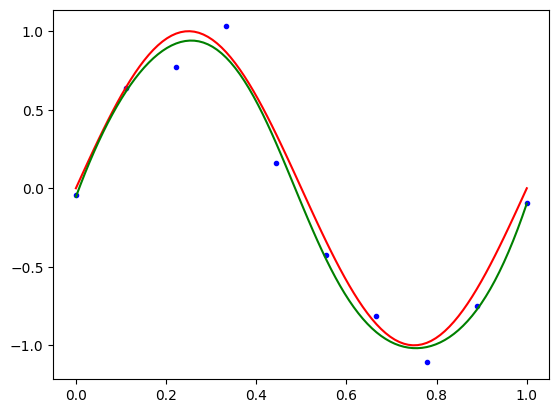

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 18 11:43:49 2022

@author: Y P Zhu

NN regression algorithm - Sine 
"""
import os
os.system('cls')  # On Windows System

from IPython import get_ipython
get_ipython().run_line_magic('reset','-sf')

"""
Start coding
"""
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Import pyplot
# plt.close('all')

"""
---- NN regresion based on Python coding
"""

# Random data
def random_number(a,b):
    return (b-a)*np.random.normal()+a
 
# Generate m*n matrix, initial values are zeros
def makematrix(m, n, fill=0.0):
    a = []
    for i in range(m):
        a.append([fill]*n)
    return np.array(a)
 
# sigmoid() function (activation function)
def sigmoid(x):
    fAct = (np.exp(1*x)-np.exp(-1*x))/(np.exp(1*x)+np.exp(-1*x))
    return fAct

# Derivation of the activation fucntion
def derived_sigmoid(x):
    fAct = (np.exp(1*x)-np.exp(-1*x))/(np.exp(1*x)+np.exp(-1*x))
    DfAct = (1-fAct**2)
    return DfAct

# 3-layer BP Neural Networks
class BPNN:
    def __init__(self, num_in, num_hidden, num_out):
        # Nodes of input, hidden, output layers
        self.num_in = num_in + 1  # Add one bias node
        self.num_hidden = num_hidden + 1   # Add one bias node
        self.num_out = num_out
        
        # Activate all nodes (vector)
        self.active_in = np.array([1.0]*self.num_in)
        self.active_hidden = np.array([1.0]*self.num_hidden)
        self.active_out = np.array([1.0]*self.num_out)
        
        # Create weight matrices
        self.wight_in = makematrix(self.num_in, self.num_hidden-1)
        self.wight_out = makematrix(self.num_hidden, self.num_out)
        
        # Initialize weights
        for i in range(self.num_in):
            for j in range(self.num_hidden-1):
                self.wight_in[i][j] = random_number(-1, 1)
        for i in range(self.num_hidden):
            for j in range(self.num_out):
                self.wight_out[i][j] = random_number(-1, 1)
        # Initialize bias
        for j in range(self.num_hidden-1):
            self.wight_in[0][j] = random_number(-1, 1)
        for j in range(self.num_out):
            self.wight_out[0][j] = random_number(-1, 1)
              
    # Feed-forward
    def Feedforward(self, inputs):
        if np.shape(inputs)[1] != self.num_in-1:
            raise ValueError('Incorrect input numbers')
        # Input layer values
        self.active_in[1:self.num_in]=inputs
        
        # Hidden layer values
        self.sum_hidden=np.dot(self.wight_in.T,np.array([self.active_in]).T)
        self.active_hidden = np.vstack( (1, sigmoid(self.sum_hidden)) )   # Activation function
    
        # Output layer values
        self.sum_out=np.dot(self.wight_out.T,self.active_hidden)
        self.active_out = self.sum_out #sigmoid(self.sum_out)

        return self.active_out

 
    # Backpropagation
    def errorbackpropagate(self, targets, lr):   # lr is the learning rate
        if self.num_out==1:
            targets=targets
        if np.shape(targets)[1] != self.num_out:
            raise ValueError('Incorrect Output numbers')
        # Cost function
        self.error=(1/2)*np.dot((self.active_out-targets.T).T,(self.active_out-targets.T))
        
        # dJ/dw_out
        self.gradient_out = (self.active_out-targets.T) #*derived_sigmoid(self.sum_out)#dJ/dx
        self.gradient_w_out = np.dot(self.gradient_out,self.active_hidden.T).T #dx/dw_out

        # dJ/dw_in
        self.gradient_hidden = np.dot(self.wight_out[1:],self.gradient_out)*derived_sigmoid(self.sum_hidden) #dJ/dx
        self.gradient_w_in = np.dot(self.gradient_hidden,np.array([self.active_in])).T #dx/dw_in
        
        self.wight_out = self.wight_out - lr*self.gradient_w_out
        self.wight_in = self.wight_in - lr*self.gradient_w_in
        return self.error

    def train(self, pattern, itera=20000, lr = 0.1):
        for i in range(itera):
            error = 0
            for j in pattern:
                inputs = np.array([j[0:self.num_in-1]])
                targets = np.array([j[self.num_in-1:]])
                
                self.Feedforward(inputs)
                self.errorbackpropagate(targets, lr)
            
                error = error + self.error
            
            if i % 10 == 0:
                print('################# error %-.5f##################The %d th iteration' %(error,i))
    # Weights
    def weights(self):
        print("input weights")
        print(self.wight_in)
        print("Output weights")
        print(self.wight_out)
        
    # Test prediction
    def test(self, patterns):
        Pre = []
        for i in patterns:
            inputs = np.array([i[0:self.num_in-1]])
            Pre.append( self.Feedforward(inputs) )
            print('checkx')
            print(Pre)
        return Pre         

""" Distributed samples """
nsp=10

x_sample = np.linspace(0, 1, nsp) # Select nsp points as the x
y_tag = np.sin(2 * np.pi * x_sample) # The target function
# print(y_tag)
np.random.seed(2)
y_noi = np.random.normal(0, 0.1, nsp) + y_tag # Normal distribution noise

pattern = np.vstack( (x_sample,y_noi) ).T

n = BPNN(1, 8, 1) #Create neural networK 
n.train(pattern) # Training BP
    
xp_sample = np.linspace(0, 1, 100) # Select 1000 points as the x_p
y_true = np.sin(2 * np.pi * xp_sample) # The target function

patternP = np.vstack( (xp_sample, y_true) ).T
d=n.test(patternP)

y_pred = np.zeros((100,))
for i in range(100):
    y_pred[i] = d[i][0,0]
    
n.weights() # check weights

plt.figure(1)
plt.plot(x_sample, y_noi, 'b.')
plt.plot(xp_sample,y_true,'r')
plt.plot(xp_sample,y_pred,'g')
plt.show()


################# error 23.04905##################The 0 th iteration
################# error 2.82725##################The 10 th iteration
################# error 2.41984##################The 20 th iteration
################# error 2.29922##################The 30 th iteration
################# error 2.20668##################The 40 th iteration
################# error 2.09988##################The 50 th iteration
################# error 1.97011##################The 60 th iteration
################# error 1.81063##################The 70 th iteration
################# error 1.61851##################The 80 th iteration
################# error 1.39847##################The 90 th iteration
################# error 1.16364##################The 100 th iteration
################# error 0.93615##################The 110 th iteration
################# error 0.74230##################The 120 th iteration
################# error 0.59879##################The 130 th iteration
################# error 0.5050

################# error 0.22078##################The 1190 th iteration
################# error 0.21991##################The 1200 th iteration
################# error 0.21905##################The 1210 th iteration
################# error 0.21820##################The 1220 th iteration
################# error 0.21735##################The 1230 th iteration
################# error 0.21651##################The 1240 th iteration
################# error 0.21567##################The 1250 th iteration
################# error 0.21484##################The 1260 th iteration
################# error 0.21401##################The 1270 th iteration
################# error 0.21319##################The 1280 th iteration
################# error 0.21238##################The 1290 th iteration
################# error 0.21157##################The 1300 th iteration
################# error 0.21078##################The 1310 th iteration
################# error 0.20999##################The 1320 th iteration
######

################# error 0.17496##################The 2560 th iteration
################# error 0.17486##################The 2570 th iteration
################# error 0.17477##################The 2580 th iteration
################# error 0.17467##################The 2590 th iteration
################# error 0.17458##################The 2600 th iteration
################# error 0.17449##################The 2610 th iteration
################# error 0.17439##################The 2620 th iteration
################# error 0.17430##################The 2630 th iteration
################# error 0.17420##################The 2640 th iteration
################# error 0.17411##################The 2650 th iteration
################# error 0.17402##################The 2660 th iteration
################# error 0.17392##################The 2670 th iteration
################# error 0.17383##################The 2680 th iteration
################# error 0.17374##################The 2690 th iteration
######

################# error 0.15941##################The 3830 th iteration
################# error 0.15926##################The 3840 th iteration
################# error 0.15911##################The 3850 th iteration
################# error 0.15896##################The 3860 th iteration
################# error 0.15881##################The 3870 th iteration
################# error 0.15867##################The 3880 th iteration
################# error 0.15852##################The 3890 th iteration
################# error 0.15838##################The 3900 th iteration
################# error 0.15823##################The 3910 th iteration
################# error 0.15809##################The 3920 th iteration
################# error 0.15795##################The 3930 th iteration
################# error 0.15781##################The 3940 th iteration
################# error 0.15767##################The 3950 th iteration
################# error 0.15753##################The 3960 th iteration
######

################# error 0.14918##################The 5090 th iteration
################# error 0.14915##################The 5100 th iteration
################# error 0.14912##################The 5110 th iteration
################# error 0.14908##################The 5120 th iteration
################# error 0.14905##################The 5130 th iteration
################# error 0.14902##################The 5140 th iteration
################# error 0.14899##################The 5150 th iteration
################# error 0.14896##################The 5160 th iteration
################# error 0.14893##################The 5170 th iteration
################# error 0.14891##################The 5180 th iteration
################# error 0.14888##################The 5190 th iteration
################# error 0.14885##################The 5200 th iteration
################# error 0.14882##################The 5210 th iteration
################# error 0.14879##################The 5220 th iteration
######

################# error 0.14700##################The 6320 th iteration
################# error 0.14699##################The 6330 th iteration
################# error 0.14698##################The 6340 th iteration
################# error 0.14697##################The 6350 th iteration
################# error 0.14696##################The 6360 th iteration
################# error 0.14695##################The 6370 th iteration
################# error 0.14694##################The 6380 th iteration
################# error 0.14693##################The 6390 th iteration
################# error 0.14693##################The 6400 th iteration
################# error 0.14692##################The 6410 th iteration
################# error 0.14691##################The 6420 th iteration
################# error 0.14690##################The 6430 th iteration
################# error 0.14689##################The 6440 th iteration
################# error 0.14688##################The 6450 th iteration
######

################# error 0.14627##################The 7560 th iteration
################# error 0.14627##################The 7570 th iteration
################# error 0.14626##################The 7580 th iteration
################# error 0.14626##################The 7590 th iteration
################# error 0.14626##################The 7600 th iteration
################# error 0.14625##################The 7610 th iteration
################# error 0.14625##################The 7620 th iteration
################# error 0.14625##################The 7630 th iteration
################# error 0.14624##################The 7640 th iteration
################# error 0.14624##################The 7650 th iteration
################# error 0.14624##################The 7660 th iteration
################# error 0.14623##################The 7670 th iteration
################# error 0.14623##################The 7680 th iteration
################# error 0.14623##################The 7690 th iteration
######

################# error 0.14598##################The 8890 th iteration
################# error 0.14598##################The 8900 th iteration
################# error 0.14598##################The 8910 th iteration
################# error 0.14597##################The 8920 th iteration
################# error 0.14597##################The 8930 th iteration
################# error 0.14597##################The 8940 th iteration
################# error 0.14597##################The 8950 th iteration
################# error 0.14597##################The 8960 th iteration
################# error 0.14597##################The 8970 th iteration
################# error 0.14597##################The 8980 th iteration
################# error 0.14597##################The 8990 th iteration
################# error 0.14596##################The 9000 th iteration
################# error 0.14596##################The 9010 th iteration
################# error 0.14596##################The 9020 th iteration
######

################# error 0.14587##################The 10150 th iteration
################# error 0.14587##################The 10160 th iteration
################# error 0.14587##################The 10170 th iteration
################# error 0.14587##################The 10180 th iteration
################# error 0.14587##################The 10190 th iteration
################# error 0.14587##################The 10200 th iteration
################# error 0.14587##################The 10210 th iteration
################# error 0.14587##################The 10220 th iteration
################# error 0.14587##################The 10230 th iteration
################# error 0.14587##################The 10240 th iteration
################# error 0.14587##################The 10250 th iteration
################# error 0.14586##################The 10260 th iteration
################# error 0.14586##################The 10270 th iteration
################# error 0.14586##################The 10280 th it

################# error 0.14583##################The 11440 th iteration
################# error 0.14583##################The 11450 th iteration
################# error 0.14583##################The 11460 th iteration
################# error 0.14583##################The 11470 th iteration
################# error 0.14582##################The 11480 th iteration
################# error 0.14582##################The 11490 th iteration
################# error 0.14582##################The 11500 th iteration
################# error 0.14582##################The 11510 th iteration
################# error 0.14582##################The 11520 th iteration
################# error 0.14582##################The 11530 th iteration
################# error 0.14582##################The 11540 th iteration
################# error 0.14582##################The 11550 th iteration
################# error 0.14582##################The 11560 th iteration
################# error 0.14582##################The 11570 th it

################# error 0.14581##################The 12720 th iteration
################# error 0.14581##################The 12730 th iteration
################# error 0.14581##################The 12740 th iteration
################# error 0.14581##################The 12750 th iteration
################# error 0.14581##################The 12760 th iteration
################# error 0.14581##################The 12770 th iteration
################# error 0.14581##################The 12780 th iteration
################# error 0.14581##################The 12790 th iteration
################# error 0.14581##################The 12800 th iteration
################# error 0.14581##################The 12810 th iteration
################# error 0.14581##################The 12820 th iteration
################# error 0.14581##################The 12830 th iteration
################# error 0.14581##################The 12840 th iteration
################# error 0.14581##################The 12850 th it

################# error 0.14580##################The 13960 th iteration
################# error 0.14580##################The 13970 th iteration
################# error 0.14580##################The 13980 th iteration
################# error 0.14580##################The 13990 th iteration
################# error 0.14580##################The 14000 th iteration
################# error 0.14580##################The 14010 th iteration
################# error 0.14580##################The 14020 th iteration
################# error 0.14580##################The 14030 th iteration
################# error 0.14580##################The 14040 th iteration
################# error 0.14580##################The 14050 th iteration
################# error 0.14580##################The 14060 th iteration
################# error 0.14580##################The 14070 th iteration
################# error 0.14580##################The 14080 th iteration
################# error 0.14580##################The 14090 th it

################# error 0.14580##################The 15200 th iteration
################# error 0.14580##################The 15210 th iteration
################# error 0.14580##################The 15220 th iteration
################# error 0.14580##################The 15230 th iteration
################# error 0.14580##################The 15240 th iteration
################# error 0.14580##################The 15250 th iteration
################# error 0.14580##################The 15260 th iteration
################# error 0.14580##################The 15270 th iteration
################# error 0.14580##################The 15280 th iteration
################# error 0.14580##################The 15290 th iteration
################# error 0.14580##################The 15300 th iteration
################# error 0.14580##################The 15310 th iteration
################# error 0.14580##################The 15320 th iteration
################# error 0.14580##################The 15330 th it

################# error 0.14580##################The 16430 th iteration
################# error 0.14580##################The 16440 th iteration
################# error 0.14580##################The 16450 th iteration
################# error 0.14580##################The 16460 th iteration
################# error 0.14580##################The 16470 th iteration
################# error 0.14580##################The 16480 th iteration
################# error 0.14580##################The 16490 th iteration
################# error 0.14580##################The 16500 th iteration
################# error 0.14580##################The 16510 th iteration
################# error 0.14580##################The 16520 th iteration
################# error 0.14580##################The 16530 th iteration
################# error 0.14580##################The 16540 th iteration
################# error 0.14580##################The 16550 th iteration
################# error 0.14580##################The 16560 th it

################# error 0.14580##################The 17680 th iteration
################# error 0.14580##################The 17690 th iteration
################# error 0.14580##################The 17700 th iteration
################# error 0.14580##################The 17710 th iteration
################# error 0.14580##################The 17720 th iteration
################# error 0.14580##################The 17730 th iteration
################# error 0.14580##################The 17740 th iteration
################# error 0.14580##################The 17750 th iteration
################# error 0.14580##################The 17760 th iteration
################# error 0.14580##################The 17770 th iteration
################# error 0.14580##################The 17780 th iteration
################# error 0.14580##################The 17790 th iteration
################# error 0.14580##################The 17800 th iteration
################# error 0.14580##################The 17810 th it

################# error 0.14580##################The 18880 th iteration
################# error 0.14580##################The 18890 th iteration
################# error 0.14580##################The 18900 th iteration
################# error 0.14580##################The 18910 th iteration
################# error 0.14580##################The 18920 th iteration
################# error 0.14580##################The 18930 th iteration
################# error 0.14580##################The 18940 th iteration
################# error 0.14580##################The 18950 th iteration
################# error 0.14580##################The 18960 th iteration
################# error 0.14580##################The 18970 th iteration
################# error 0.14580##################The 18980 th iteration
################# error 0.14580##################The 18990 th iteration
################# error 0.14580##################The 19000 th iteration
################# error 0.14580##################The 19010 th it

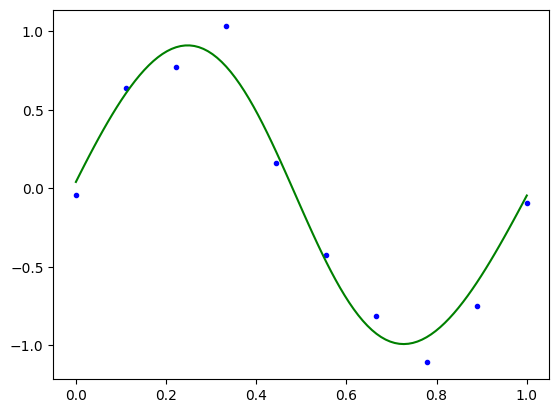

In [9]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 18 11:43:49 2022

@author: Y P Zhu

NN regression algorithm - RegSine 
"""
import os
os.system('cls')  # On Windows System

from IPython import get_ipython
get_ipython().run_line_magic('reset','-sf')

"""
Start coding
"""
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Import pyplot
# plt.close('all')

"""
---- NN regresion based on Python coding
"""

# Random data
def random_number(a,b):
    return (b-a)*np.random.normal()+a
 
# Generate m*n matrix, initial values are zeros
def makematrix(m, n, fill=0.0):
    a = []
    for i in range(m):
        a.append([fill]*n)
    return np.array(a)
 
# sigmoid() function (activation function)
def sigmoid(x):
    fAct = (np.exp(1*x)-np.exp(-1*x))/(np.exp(1*x)+np.exp(-1*x))
    return fAct

# Derivation of the activation fucntion
def derived_sigmoid(x):
    fAct = (np.exp(1*x)-np.exp(-1*x))/(np.exp(1*x)+np.exp(-1*x))
    DfAct = (1-fAct**2)
    return DfAct

# 3-layer BP Neural Networks
class BPNN:
    def __init__(self, num_in, num_hidden, num_out):
        # Nodes of input, hidden, output layers
        self.num_in = num_in + 1  # Add one bias node
        self.num_hidden = num_hidden + 1   # Add one bias node
        self.num_out = num_out
        
        # Activate all nodes (vector)
        self.active_in = np.array([1.0]*self.num_in)
        self.active_hidden = np.array([1.0]*self.num_hidden)
        self.active_out = np.array([1.0]*self.num_out)
        
        # Create weight matrices
        self.wight_in = makematrix(self.num_in, self.num_hidden-1)
        self.wight_out = makematrix(self.num_hidden, self.num_out)
        
        # Initialize weights
        for i in range(self.num_in):
            for j in range(self.num_hidden-1):
                self.wight_in[i][j] = random_number(-1, 1)
        for i in range(self.num_hidden):
            for j in range(self.num_out):
                self.wight_out[i][j] = random_number(-1, 1)
        # Initialize bias
        for j in range(self.num_hidden-1):
            self.wight_in[0][j] = random_number(-1, 1)
        for j in range(self.num_out):
            self.wight_out[0][j] = random_number(-1, 1)
              
    # Feed-forward
    def Feedforward(self, inputs):
        if np.shape(inputs)[1] != self.num_in-1:
            raise ValueError('Incorrect input numbers')
        # Input layer values
        self.active_in[1:self.num_in]=inputs
        
        # Hidden layer values
        self.sum_hidden=np.dot(self.wight_in.T,np.array([self.active_in]).T)
        self.active_hidden = np.vstack( (1, sigmoid(self.sum_hidden)) )   # Activation function
    
        # Output layer values
        self.sum_out=np.dot(self.wight_out.T,self.active_hidden)
        self.active_out = self.sum_out #sigmoid(self.sum_out)

        return self.active_out

 
    # Backpropagation
    def errorbackpropagate(self, targets, lr, Reg):   # lr is the learning rate
        if self.num_out==1:
            targets=targets
        if np.shape(targets)[1] != self.num_out:
            raise ValueError('Incorrect Output numbers')
        # Cost function
        self.error=(1/2)*np.dot((self.active_out-targets.T).T,(self.active_out-targets.T))
        
        # dJ/dw_out
        self.gradient_out = (self.active_out-targets.T) #*derived_sigmoid(self.sum_out)#dJ/dx
        self.gradient_w_out = np.dot(self.gradient_out,self.active_hidden.T).T + Reg*self.wight_out #dx/dw_out

        # dJ/dw_in
        self.gradient_hidden = np.dot(self.wight_out[1:],self.gradient_out)*derived_sigmoid(self.sum_hidden) #dJ/dx
        self.gradient_w_in = np.dot(self.gradient_hidden,np.array([self.active_in])).T + Reg*self.wight_in #dx/dw_in
        
        self.wight_out = self.wight_out - lr*self.gradient_w_out
        self.wight_in = self.wight_in - lr*self.gradient_w_in
        return self.error

    def train(self, pattern, itera=20000, lr = 0.1, Reg=1*0.001):
        for i in range(itera):
            error = 0
            for j in pattern:
                inputs = np.array([j[0:self.num_in-1]])
                targets = np.array([j[self.num_in-1:]])
                
                self.Feedforward(inputs)
                self.errorbackpropagate(targets, lr, Reg)
            
                error = error + self.error
            
            if i % 10 == 0:
                print('################# error %-.5f##################The %d th iteration' %(error,i))
    # Weights
    def weights(self):
        print("input weights")
        print(self.wight_in)
        print("Output weights")
        print(self.wight_out)
        
    # Test prediction
    def test(self, patterns):
        Pre = []
        for i in patterns:
            inputs = np.array([i[0:self.num_in-1]])
            Pre.append( self.Feedforward(inputs) )
        return Pre         

""" Distributed samples """
nsp=10

x_sample = np.linspace(0, 1, nsp) # Select nsp points as the x
y_tag = np.sin(2 * np.pi * x_sample) # The target function
# print(y_tag)
np.random.seed(2)
y_noi = np.random.normal(0, 0.1, nsp) + y_tag # Normal distribution noise

pattern = np.vstack( (x_sample,y_noi) ).T

n = BPNN(1, 10, 1) #Create neural networK 
n.train(pattern) # Training BP
    
xp_sample = np.linspace(0, 1, 100) # Select 1000 points as the x_p
y_true = np.sin(2 * np.pi * xp_sample) # The target function

patternP = np.vstack( (xp_sample, y_true) ).T
d=n.test(patternP)

y_pred = np.zeros((100,))
for i in range(100):
    y_pred[i] = d[i][0,0]
    
n.weights() # check weights

plt.figure(1)
plt.plot(x_sample, y_noi, 'b.')
# plt.plot(xp_sample,y_true,'r')
plt.plot(xp_sample,y_pred,'g')
plt.show()
